In [13]:
%run ./Load_Wine_data.ipynb
%run ../Code/Aulas/functions.ipynb
from sklearn import tree

Red (1599, 12)
White (4898, 12)
Total (6497, 13)


In [14]:
pd.set_option("display.precision", 2)
feature_norm  = True

target_variable = ['quality']
classifier_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                      'pH', 'sulphates', 'alcohol']

In [15]:
data= df_red.copy()
data.drop(columns = ["red"],inplace = True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


## Cross Validation

In [16]:
X = data[classifier_variables].values
Y = data[target_variable].values
idx = Y > 5
classes=['baixa qualidade','alta qualidade']
Y[idx] = 1
Y[~idx]= 0

# Dividir 20% dos dados para o conjunto out-of-sample de teste
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X,
                                                                Y,
                                                                test_size=0.2,
                                                                random_state=0,
                                                                stratify=Y)

# Objeto de validacao cruzada
cvfold = model_selection.StratifiedKFold(n_splits = 10, random_state = 0)

C:\Users\OctavioLuisElliotFre\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Decision tree Curva de aprendizado

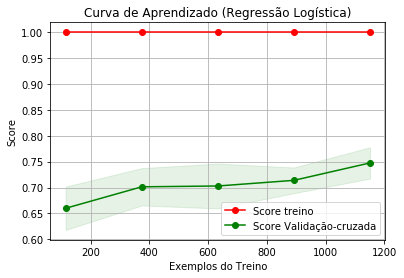

In [17]:
plt.figure()

scorer = metrics.make_scorer(metrics.accuracy_score)

title = "Curva de Aprendizado (Regressão Logística)"
estimator = tree.DecisionTreeClassifier(random_state=0)
plot_learning_curve(estimator, title, Xtrain, Ytrain, ax=plt.gca(),
                    cv=cvfold.split(Xtrain, Ytrain, groups=Ytrain),
                    scoring=scorer, n_jobs=3)


## Pipeline Decision tree

In [19]:
# Configure Pipeline
conf_train_pipe = [
    ('Scaler', StandardScaler()),
    ('Model', tree.DecisionTreeClassifier( random_state = 0)),
]

# Create Pipeline
model_pipe = pipeline.Pipeline(conf_train_pipe)

param_grid = {
    'Model__max_depth': [4,5,6,8,10,12],
}

model_pipe = model_selection.GridSearchCV(model_pipe, param_grid,
                                     scoring=None,
                                     fit_params=None,
                                     cv=cvfold)

model_pipe.fit(Xtrain, Ytrain)

TypeError: __init__() got an unexpected keyword argument 'fit_params'

## Estimativa do modelo

In [21]:
Yhat = model_pipe.predict_proba(Xtest)[:,1]
Ypred= model_pipe.predict(Xtest)
print('Yhat.shape:', Yhat.shape)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.